In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Importation de notre fichier APRES preprocessing 
data = pd.read_csv("operations_enrichies.csv", parse_dates=[0])
data.head(3)

,date_operation,libelle,montant,solde_avt_ope,categ,type,tranche_depense,sens,annee,mois,jour,jour_sem,jour_sem_num,weekend,quart_mois
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,DON,petite,debit,2023,3,31,Friday,5,False,4
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,CARTE,petite,debit,2023,4,3,Monday,1,False,1
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,CARTE,moyenne,debit,2023,4,3,Monday,1,False,1


# Représenter une variable sous forme de graphique

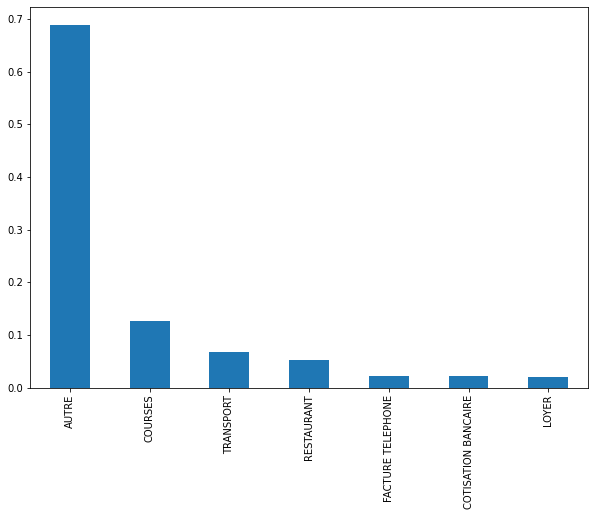

In [3]:
data['categ'].value_counts(normalize=True).plot(kind='bar',figsize=(10,7))
plt.show()

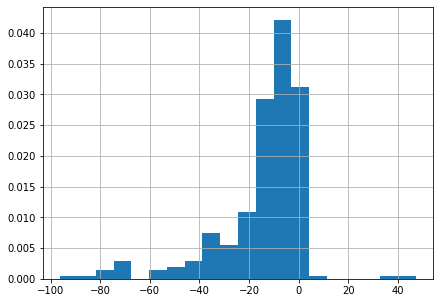

In [5]:
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20,figsize=(7,5))
plt.show()

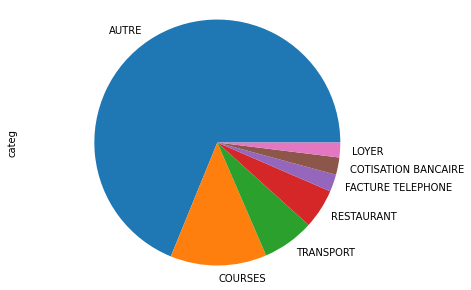

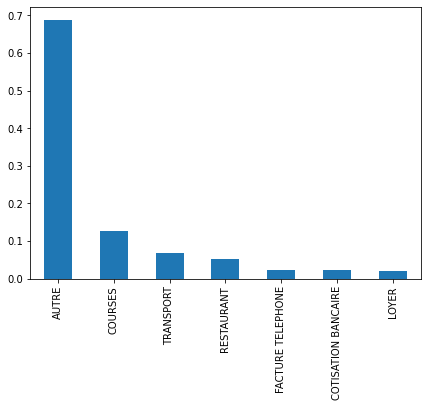

In [6]:
## VARIABLE QUALITATIVE ##

# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie', figsize=(7,5))
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar', figsize=(7,5))
plt.show()


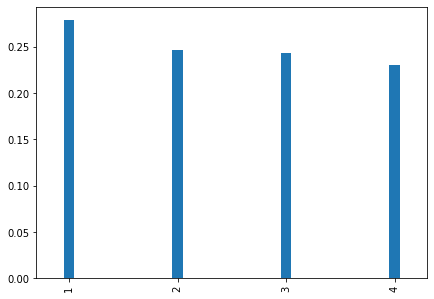

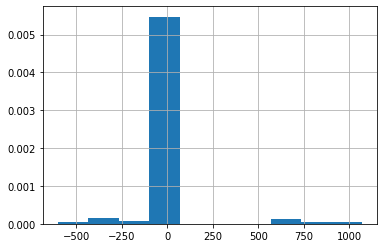

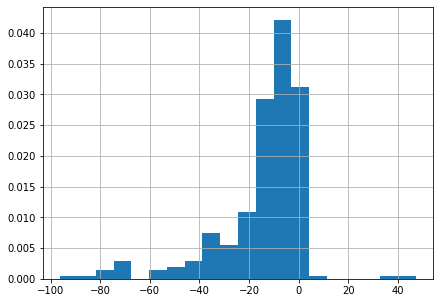

In [9]:
## VARIABLE QUANTITATIVE ##

## Diagramme en bâtons
data["quart_mois"].value_counts(normalize=True).plot(kind='bar', width=0.1, figsize=(7,5))
plt.show()

## Histogramme
data["montant"].hist(density=True)
plt.show()

## Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True, bins=20, figsize=(7,5))
# on a restreint a -100 < montant < 100
plt.show() 

# nombre optimal de classe d'un histogramme k = [1+log2(n)] ave n la taille de l'echantillon

# Représenter une variable sous forme de tableau

In [10]:
# Recuperation modalite et effectif
effectifs = data["quart_mois"].value_counts()
modalites = effectifs.index

In [11]:
# Mise sous forme de dataframe
tab = pd.DataFrame(modalites, columns = ["quart_mois"])

tab

,quart_mois
0,1
1,2
2,3
3,4


In [12]:
# Ajout des effectifs
tab["n"] = effectifs.values

tab

,quart_mois,n
0,1,86
1,2,76
2,3,75
3,4,71


In [13]:
# Ajout des frequences
tab["f"] = tab["n"] / len(data)

tab

,quart_mois,n,f
0,1,86,0.279221
1,2,76,0.246753
2,3,75,0.243506
3,4,71,0.230519


In [14]:
# Ajout des frequences cumulées
tab = tab.sort_values("quart_mois")
tab["F"] = tab["f"].cumsum()

tab

,quart_mois,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


# Mesures de tendance centrale, de dispersion et de forme

In [15]:
#moyenne
data['montant'].mean()

2.872564935064936

In [16]:
#mediane
data['montant'].median()

-9.6

In [17]:
#mode == valeur la plus frequente
data['montant'].mode()

0   -1.6
dtype: float64

--------------------
AUTRE
mean:
 23.43320754716981
median:
 -8.31
mode:
 -1.6
var:
 40401.82999254183
std:
 201.00206464746034
skw:
 3.1215325222336427
kur:
 12.716537970826296


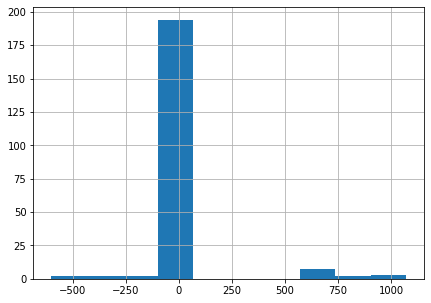

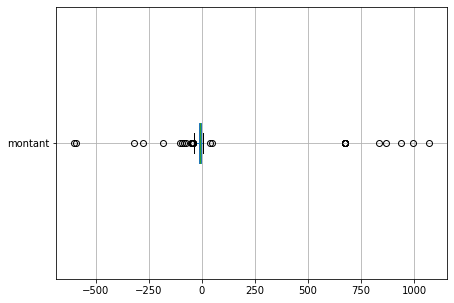

--------------------
TRANSPORT
mean:
 -52.99714285714286
median:
 -53.1
mode:
 -73.0
var:
 2205.016868027212
std:
 46.95760713694014
skw:
 -1.248265076217821
kur:
 2.1922705326917487


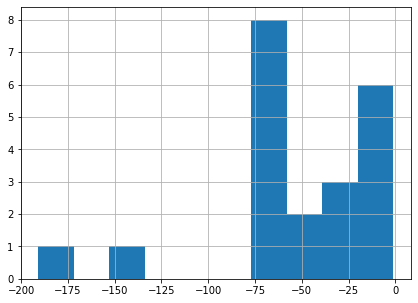

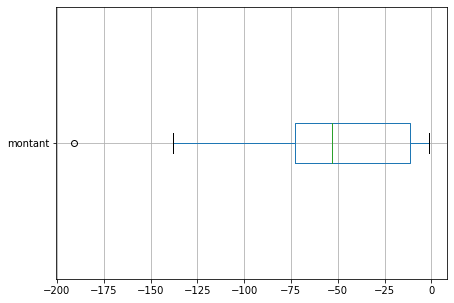

--------------------
FACTURE TELEPHONE
mean:
 -12.045714285714283
median:
 -7.02
mode:
 -7.02
var:
 105.01905306122445
std:
 10.247880417980317
skw:
 -2.3876514564281526
kur:
 5.798563367885492


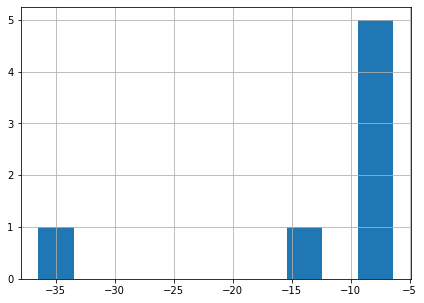

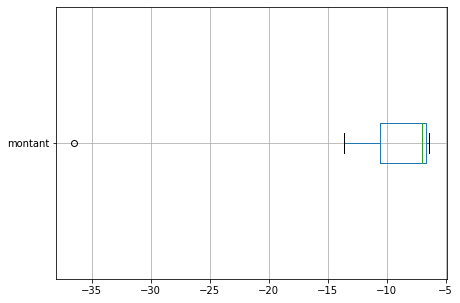

--------------------
COURSES
mean:
 -16.341282051282054
median:
 -12.24
mode:
 -60.16
var:
 177.0253547666009
std:
 13.3050875520081
skw:
 -1.246748830645698
kur:
 1.604730494087499


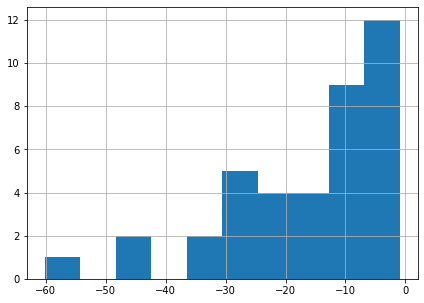

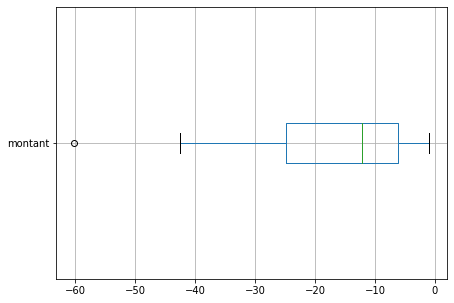

--------------------
COTISATION BANCAIRE
mean:
 -1.8857142857142857
median:
 -1.92
mode:
 -1.92
var:
 0.0015673469387755044
std:
 0.03958973274443141
skw:
 0.37416573867739106
kur:
 -2.800000000000003


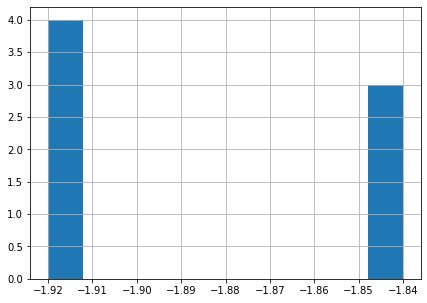

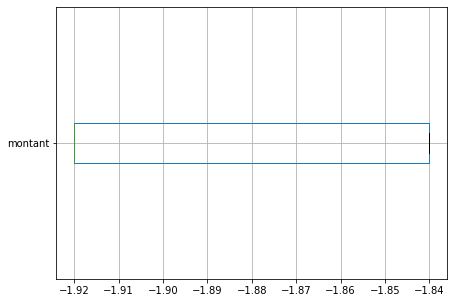

--------------------
RESTAURANT
mean:
 -10.3325
median:
 -10.1
mode:
 -9.2
var:
 2.8531937500000004
std:
 1.689139943876765
skw:
 -0.8883503487158837
kur:
 0.5988855591691937


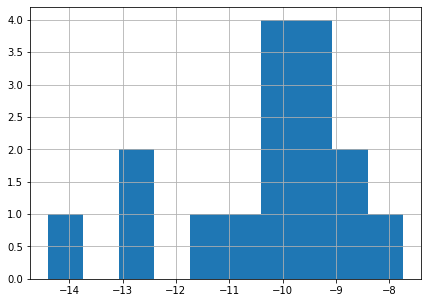

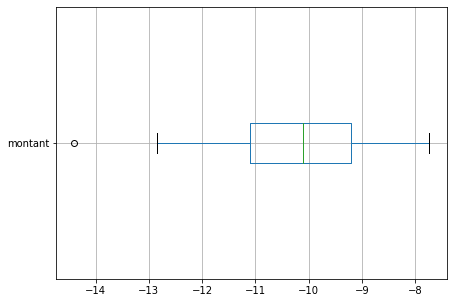

--------------------
LOYER
mean:
 -345.0
median:
 -345.0
mode:
 -345.0
var:
 0.0
std:
 0.0
skw:
 0
kur:
 0


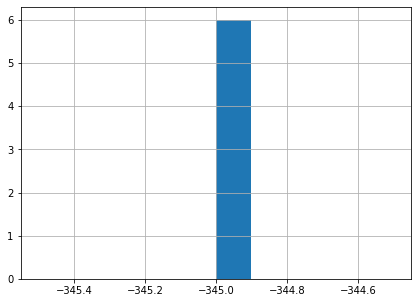

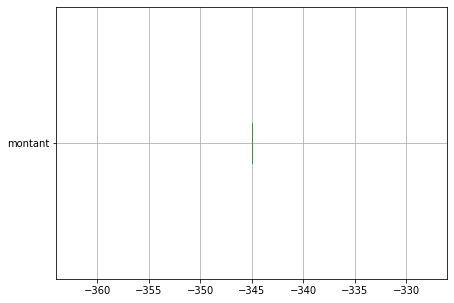

In [18]:
## Calcul des tendances centrales, dispersion et de formes par categorie

for cat in data["categ"].unique():
    sous_echantillon = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("mean:\n",sous_echantillon['montant'].mean())
    print("median:\n",sous_echantillon['montant'].median())
    print("mode:\n",sous_echantillon['montant'].mode()[0])
    
    #mesure de distribution
    print("var:\n",sous_echantillon['montant'].var(ddof=0))
    print("std:\n",sous_echantillon['montant'].std(ddof=0))
    
    #mesure de forme
    print("skw:\n",sous_echantillon['montant'].skew()) #skewness une mesure d'asymetrie
    print("kur:\n",sous_echantillon['montant'].kurtosis()) #mesure d'aplatissement par rapport a une Gaussienne
    
    sous_echantillon["montant"].hist(figsize=(7,5)) # Crée l'histogramme
    plt.show() # Affiche l'histogramme
    
    sous_echantillon.boxplot(column="montant", vert=False, figsize=(7,5))
    plt.show()

###### Skewness empirique: 
γ1 = μ3/s3  
avec μ3 = (1/n) * ∑ (xi − x_barre)^3  
  
Si γ1 = 0, alors la distribution est symétrique.  
Si γ1 > 0, alors la distribution est étalée à droite.  
Si γ1 < 0, alors la distribution est étalée à gauche 

###### Kurtosis

γ2 = μ4/s4 − 3  
avec μ4 = (1/n)* ∑ (xi − x_barre)^4  
  
Si γ2 = 0, alors la distribution a le même aplatissement que la distribution normale.  
Si γ2 > 0, alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.  
Si γ2 < 0, alors les observations sont moins concentrées : la distribution est plus aplatie.  

# Mesures de concentration

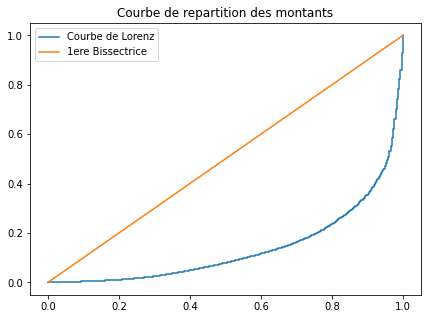

In [19]:
## Courbe de Lorenz
#modélise la repartition de la concentration par individu

depenses = data[data['montant'] < 0]
dep = -depenses['montant'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(7,5))
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post',label= "Courbe de Lorenz")
plt.plot(np.linspace(0,1,len(lorenz)),np.linspace(0,1,len(lorenz)), label = "1ere Bissectrice")
plt.title("Courbe de repartition des montants")
plt.legend()
plt.show()

In [20]:
## Indice de Gini
#mesure la concentration de la repartition 

aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S

print("Indice de Gini:",gini)

Indice de Gini: 0.7248207406842819


# Autres mesures

###### Formule General de la Moyenne

Mp = ( (1/n) * ∑ ni * (ai)^p )^(1/p)  

M1  est la moyenne arithmétique x_barre.  
M2  est la moyenne quadratique.  
M-1 est la moyenne harmonique H.

# Analyse bivariée : 2 variables quanti

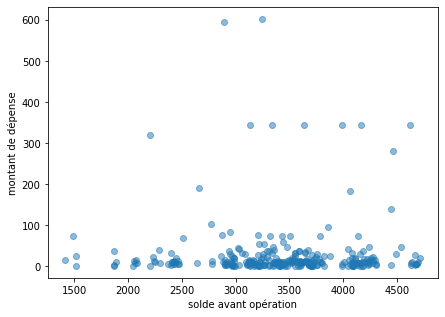

In [21]:
depenses = data[data.montant < 0]

plt.figure(figsize=(7,5))
plt.plot(depenses["solde_avt_ope"],-depenses["montant"],'o',alpha=0.5)
plt.xlabel("solde avant opération")
plt.ylabel("montant de dépense")
plt.show()

In [22]:
taille_classe = 500 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(depenses["solde_avt_ope"]), taille_classe)
tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(depenses["solde_avt_ope"], tranches) # associe chaque solde à son numéro de classe

for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = -depenses.loc[indices==ind,"montant"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

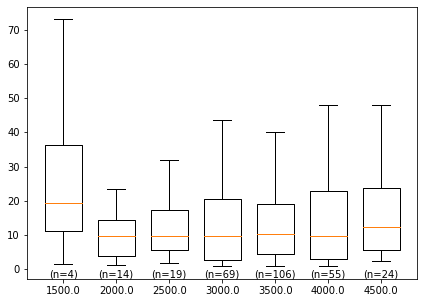

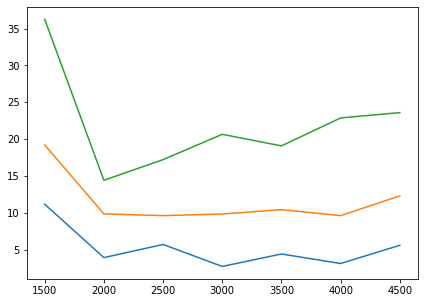

In [23]:
# affichage des boxplots
plt.figure(figsize=(7,5))
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7, # largeur graphique des boxplots
           )

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

# affichage des quartiles
plt.figure(figsize=(7,5))
for n_quartile in range(3):
    plt.plot([g["centre_classe"] for g in groupes],
             [g["quartiles"][n_quartile] for g in groupes])
plt.show()

###### Correlation et Covariance

In [24]:
import scipy.stats as st

In [25]:
print("coefficient de correlation :",st.pearsonr(depenses["solde_avt_ope"],-depenses["montant"])[0])

coefficient de correlation : 0.014536146489774594


In [26]:
print("covariance solde et montant :",np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0)[1,0])

covariance solde et montant : 705.0942213554379


## Régression linéaire

### Calcul de la variable *attente* entre 2 courses

In [27]:
import datetime as dt

# Selection du sous-échantillon
courses = data[data.categ == "COURSES"]

# On trie les opérations par date
courses = courses.sort_values("date_operation")

# On ramène les montants en positif
courses["montant"] = -courses["montant"]

# calcul de la variable attente
r = []
last_date = dt.datetime.now()
for i,row in courses.iterrows():
    days = (row["date_operation"]-last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["date_operation"]
courses["attente"] = r
courses = courses.iloc[1:,]

# on regroupe les opérations qui ont été effectués à la même date
# (courses réalisées le même jour mais dans 2 magasins différents)
a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()
courses = pd.DataFrame([a for a in zip(a,b)])
courses.columns = ["montant","attente"]

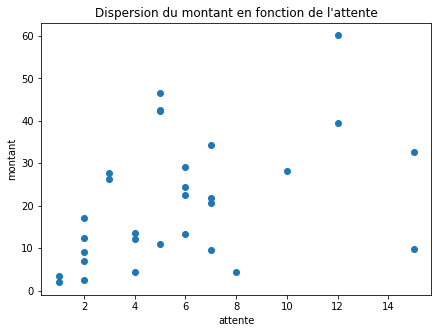

In [28]:
plt.figure(figsize=(7,5))
plt.plot(courses.attente,courses.montant, "o")
plt.xlabel("attente")
plt.ylabel("montant")
plt.title("Dispersion du montant en fonction de l'attente")
plt.show()

### Régression linéaire

In [29]:
import statsmodels.api as sm

Y = courses['montant']
X = courses[['attente']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['attente'],result.params['intercept']

result.params

attente       1.736578
intercept    10.944848
dtype: float64

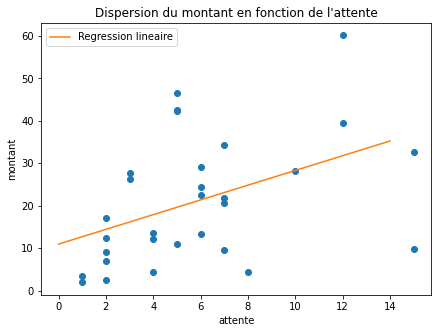

In [30]:
plt.figure(figsize=(7,5))
plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)], label = "Regression lineaire")
plt.xlabel("attente")
plt.ylabel("montant")
plt.title("Dispersion du montant en fonction de l'attente")
plt.legend()
plt.show()

### Régression linéaire sans outliers

In [31]:
courses = courses[courses.attente < 15]

attente      3.030823
intercept    5.411480
dtype: float64


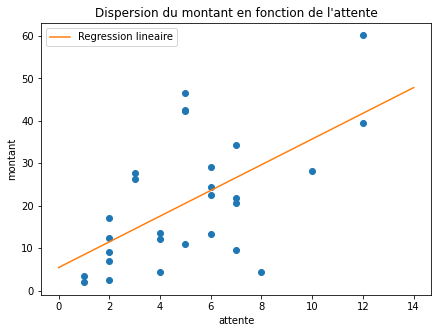

In [32]:
Y = courses['montant']
X = courses[['attente']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['attente'],result.params['intercept']

print(result.params)

plt.figure(figsize=(7,5))
plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)],label = "Regression lineaire")
plt.xlabel("attente")
plt.ylabel("montant")
plt.title("Dispersion du montant en fonction de l'attente")
plt.legend()
plt.show()

# Analyse bivariée : 1 variable quanti et 1 quali

In [33]:
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data[data["montant"] < 0].copy()
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER"] 

In [34]:
# Changement de la palette graphique
sns.set_palette(sns.color_palette("colorblind", 3))

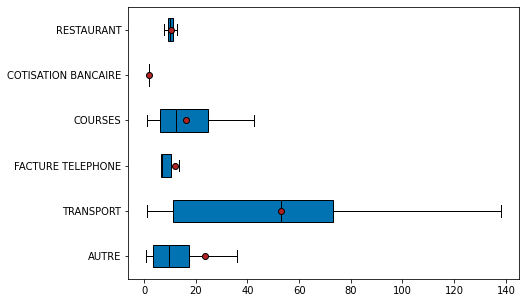

In [35]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(7,5))
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

## ANOVA

In [36]:
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data[data["montant"] < 0]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("Rapport de corrélation :",eta_squared(sous_echantillon[X],sous_echantillon[Y]))

Rapport de corrélation : 0.39841890401094926


# Analyse bivariée : 1 variable quanti et 1 quali

In [37]:
X = "quart_mois"
Y = "categ"

c = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = data[X].value_counts()
ty = data[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(data)
cont

categ,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT,Total
quart_mois,,,,,,,,
1,55.0,7.0,6.0,6.0,NaN,3.0,9.0,86.0
2,45.0,NaN,11.0,1.0,6.0,7.0,6.0,76.0
3,60.0,NaN,7.0,NaN,NaN,4.0,4.0,75.0
4,52.0,NaN,15.0,NaN,NaN,2.0,2.0,71.0
total,212.0,7.0,39.0,7.0,6.0,16.0,21.0,308.0


In [38]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(data)
indep = tx.dot(ty.T) / n

c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()

<AxesSubplot:ylabel='quart_mois'>

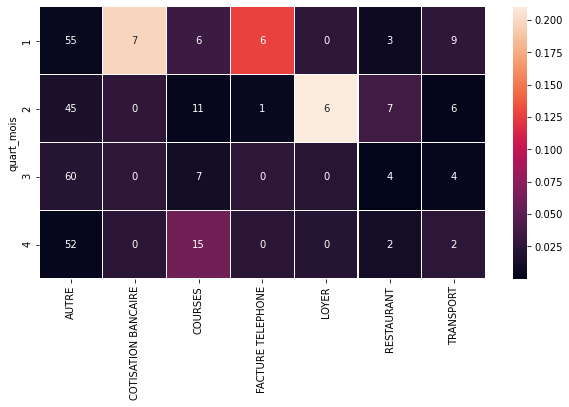

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(mesure/xi_n, annot=c, linewidth=0.1)